In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  AdaBoostRegressor, RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import seaborn as sns
import matplotlib.pyplot as plt

#### Importing data into pandas dataframe

In [6]:
data = pd.read_csv(r'C:\Users\49179\Desktop\Student Performance prediction\Data\StudentsPerformance.csv')

In [7]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Splitting dataset in to X and Y variable

In [8]:
X = data.drop(['math score'],axis =1)
Y = data['math score']

In [9]:
numerical_data = [cols for cols in X.columns if X[cols].dtypes != 'O']
categorical_data = [cols for cols in X.columns if X[cols].dtypes == 'O']

In [10]:
numerical_data

['reading score', 'writing score']

In [12]:
categorical_data

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [11]:
for i in categorical_data:
    print(f"'{i}'= {len(X[i].unique())} uniques\ncategories = {X[i].unique()}")

'gender'= 2 uniques
categories = ['female' 'male']
'race/ethnicity'= 5 uniques
categories = ['group B' 'group C' 'group A' 'group D' 'group E']
'parental level of education'= 6 uniques
categories = ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
'lunch'= 2 uniques
categories = ['standard' 'free/reduced']
'test preparation course'= 2 uniques
categories = ['none' 'completed']


In [129]:
Y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [130]:
# Encoding Categorical data
X_cat = pd.get_dummies(X[categorical_data])
X_cat.head()

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [131]:
# Scaliing Numerical features
scaler = StandardScaler()
scaler.fit(X[numerical_data])
X_num = scaler.transform(X[numerical_data])
X_num = pd.DataFrame(X_num,columns=numerical_data)
X_num.head()

,reading score,writing score
0,0.193999,0.391492
1,1.427476,1.313269
2,1.770109,1.642475
3,-0.833899,-1.583744
4,0.605158,0.457333


In [132]:
X_new = pd.concat([X_cat,X_num],axis=1)
X_new.head()

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none,reading score,writing score
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0.193999,0.391492
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1.427476,1.313269
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1.770109,1.642475
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,-0.833899,-1.583744
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0.605158,0.457333


In [133]:
X_new.shape

(1000, 19)

#### Creating training and test dataset

In [134]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new,Y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [137]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "XGBRegressor": XGBRegressor()
}

def prediction1(model):
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, Y_train) 
        print(f'Model name: {model}')
        model = model.fit(X_train,Y_train)
        score = model.score(X_train, Y_train)
        print(f"Model score: {float(format(score,'.3f'))}")
        prediction = model.predict(X_test)
        print(f"r2 score: {float(format(r2_score(Y_test,prediction),'.3f'))}")
        print(f"MAE: {float(format(mean_absolute_error(Y_test,prediction),'.3f'))}")
        print(f"MSE: {float(format(mean_squared_error(Y_test,prediction),'.3f'))}")

        print('='*50)


In [138]:
prediction1(models)

Model name: LinearRegression()
Model score: 0.874
r2 score: 0.88
MAE: 4.215
MSE: 29.095
Model name: Lasso()
Model score: 0.807
r2 score: 0.825
MAE: 5.158
MSE: 42.506
Model name: Ridge()
Model score: 0.874
r2 score: 0.881
MAE: 4.211
MSE: 29.056
Model name: KNeighborsRegressor()
Model score: 0.855
r2 score: 0.784
MAE: 5.616
MSE: 52.586
Model name: DecisionTreeRegressor()
Model score: 1.0
r2 score: 0.754
MAE: 6.125
MSE: 59.855
Model name: RandomForestRegressor()
Model score: 0.977
r2 score: 0.852
MAE: 4.669
MSE: 36.032
Model name: AdaBoostRegressor()
Model score: 0.85
r2 score: 0.847
MAE: 4.78
MSE: 37.131
Model name: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=No

In [122]:
# Linear regression

linear = LinearRegression()
linear.fit(X_train,Y_train)
Y_pred = linear.predict(X_test)
score = r2_score(Y_test,Y_pred)*100
score

88.04332983749565

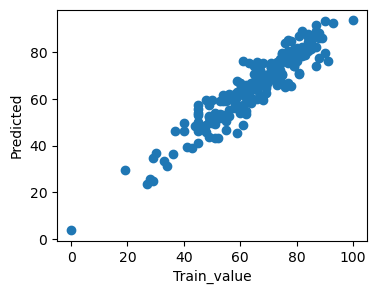

In [152]:
plt.figure(figsize=(4,3))
plt.scatter(Y_test,Y_pred)
plt.xlabel('Train_value')
plt.ylabel('Predicted')
plt.show()

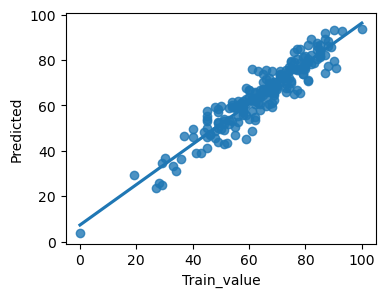

In [153]:
plt.figure(figsize=(4,3))
sns.regplot(x=Y_test,y=Y_pred,ci=None)
plt.xlabel('Train_value')
plt.ylabel('Predicted')
plt.show()